In [1]:

## general imports
import json
import numpy as np
import sys
sys.path.append('../../../../../cocoapi/coco-analyze')
## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
dataDir = '.'
dataType = 'val2017'
annType = 'person_keypoints'

annFile = 'person_keypoints_val2017.json'
resFile = 'flag_data.json'
teamName = 'fakekeypoints100'
gt_data = json.load(open(annFile, 'r'))
imgs_info = {i['id']:{'id':i['id'] ,
                      'width':i['width'],
                      'height':i['height']}
                       for i in gt_data['images']}
print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',resFile))

annFile:  [person_keypoints_val2017.json]
resFile:  [flag_data.json]


In [3]:
if sys.version_info[0] >= 3:
    unicode = str
    
team_dts = json.load(open(resFile,'r'))
team_dts = [d for d in team_dts if d['image_id'] in imgs_info]

team_img_ids = set([d['image_id'] for d in team_dts])
print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

## load ground truth annotations
coco_gt = COCO( annFile )

## initialize COCO detections api
coco_dt   = coco_gt.loadRes( team_dts )

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, 'keypoints')
if teamName == 'fakekeypoints100':
    imgIds  = sorted(coco_gt.getImgIds())[0:5000]
    coco_analyze.cocoEval.params.imgIds = imgIds

Loaded [7940] instances in [5000] images.
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.25s)
creating index...
index created!


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=3.55s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.17s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.763
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.740
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.708
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.674
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.626
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.569
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.485
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.369
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.229
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] =

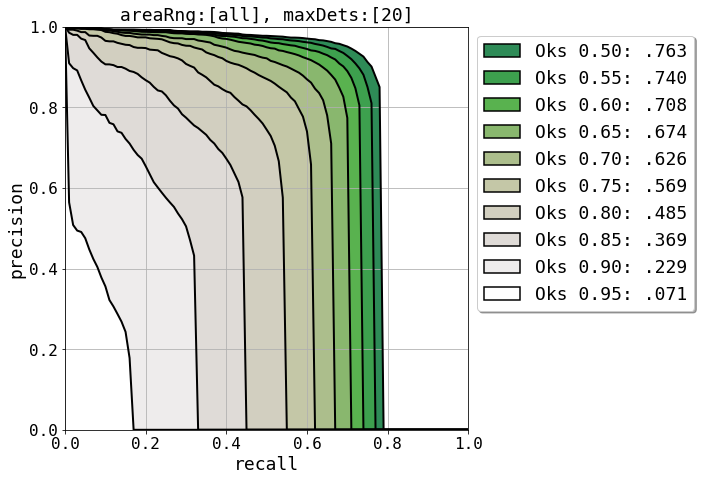

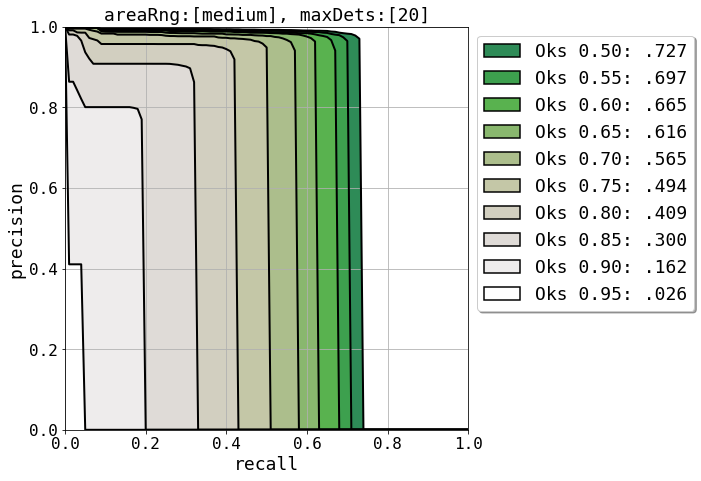

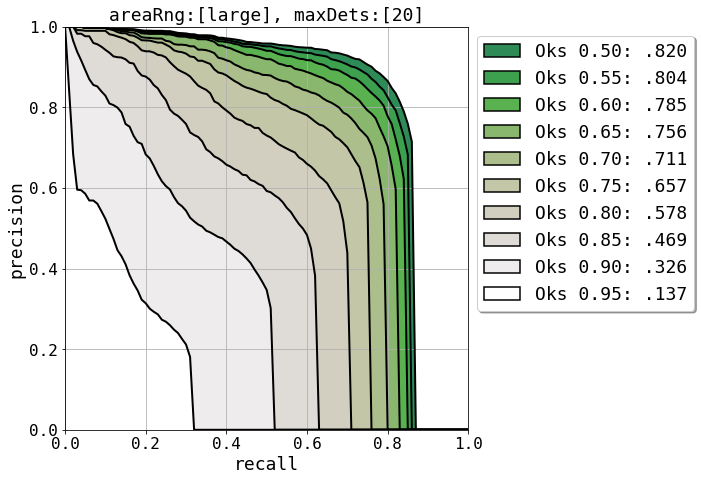

In [4]:
coco_analyze.evaluate(verbose=True, makeplots=True)

In [5]:
## NOTE: the values below are all default

# set OKS threshold of the extended error analysis
coco_analyze.params.oksThrs       = [.9]

# set OKS threshold required to match a detection to a ground truth
coco_analyze.params.oksLocThrs    = .1

# set KS threshold limits defining jitter errors
coco_analyze.params.jitterKsThrs = [.5,.85]

# set the localization errors to analyze and in what order
# note: different order will show different progressive improvement
# to study impact of single error type, study in isolation
coco_analyze.params.err_types = ['miss','swap','inversion','jitter']

# area ranges for evaluation
# 'all' range is union of medium and large
coco_analyze.params.areaRng       = [[32 ** 2, 1e5 ** 2]] #[96 ** 2, 1e5 ** 2],[32 ** 2, 96 ** 2]
coco_analyze.params.areaRngLbl    = ['all'] # 'large','medium' 

coco_analyze.params.maxDets = [20]

In [6]:

# use analyze() method for advanced error analysis 
# input arguments:
#  - check_kpts   : analyze keypoint localization errors for detections with a match (default: True)
#                 : default errors types are ['jitter','inversion','swap','miss']
#  - check_scores : analyze optimal score (maximizing oks over all matches) for every detection (default: True)
#  - check_bkgd   : analyze background false positives and false negatives (default: True)

coco_analyze.analyze(check_kpts=True, check_scores=True, check_bckgd=True)

Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.16s).
DONE (t=6.15s).
Analyzing detection scores...
<mrr:2.0>Running per image *optimal score* evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.23s).
DONE (t=3.49s).
Analyzing background false positives and false negatives...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.14s).
DONE (t=2.38s).


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.20s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.01s).
Correcting area range [all]:
Correcting error type [miss]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.34s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.01s).
Correcting error type [swap]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.20s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.01s).
Correcting error type [inversion]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.17s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.13s).
Correcting error type [jitter]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=2.15s).
<mrr:2.0

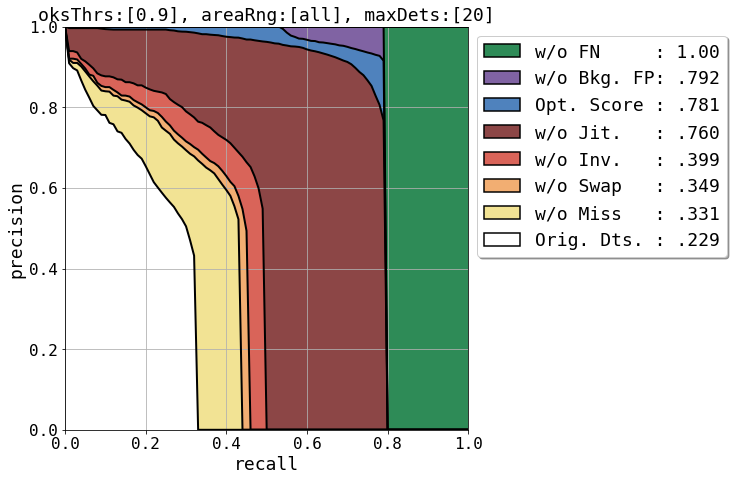

In [7]:
# use summarize() method to get the results after progressive correction of errors
# input arguments:
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.summarize(makeplots=True)

In [8]:
## print the performance summary 
for stat in coco_analyze.stats: print (stat)

{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.32950251889168763, 'err': 'baseline', 'auc': 0.22884329731183306, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.43954659949622166, 'err': 'miss', 'auc': 0.3306969464243124, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.4538727959697733, 'err': 'swap', 'auc': 0.34924703701549265, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.4959068010075567, 'err': 'inversion', 'auc': 0.3991298849685405, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.7929785894206549, 'err': 'jitter', 'auc': 0.7601890098998951, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.7931360201511335, 'err': 'score', 'auc': 0.7805032979412044, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 0.7931360201511335, 'err': 'bckgd_false_pos', 'auc': 0.7920792079207921, 'maxDets': 20}
{'oks': 0.9, 'areaRngLbl': 'all', 'recall': 1.0, 'err': 'false_neg', 'auc': 1.0, 'maxDets': 20}


In [16]:
print(len(coco_analyze.stats))
## after analyze() has been called the following variables are available
import simplejson as sjson
# list of the corrected detections
corrected_dts = coco_analyze.corrected_dts['all']
res = sorted(corrected_dts, key = lambda person:person['opt_score'])
for i in range(10):
    print(res[i])
#for i in range(len(corrected_dts)):
import numpy as np
res = np.array(res)
with open('sorted_results.json', 'w') as make_file:
    make_file.write(json.dumps(res))
"""
print("----------------------")
i = 7939
# info on keypoint detection localization error
print ('good: %s'%corrected_dts[i]['good'])
print ('miss: %s'%corrected_dts[i]['miss'])
print ('swap: %s'%corrected_dts[i]['swap'])
print ('inv.: %s'%corrected_dts[i]['inversion'])
print ('jit.: %s\n'%corrected_dts[i]['jitter'])

# corrected keypoint locations
print ('predicted keypoints:\n %s'%corrected_dts[i]['keypoints'])
print ('corrected keypoints:\n %s\n'%corrected_dts[i]['opt_keypoints'])

# optimal detection score
print ('original score: %s'%corrected_dts[i]['score'])
print ('optimal score:  %s\n'%corrected_dts[i]['opt_score'])

# image_id
print('image_id: ', corrected_dts[i]['image_id'])
"""

8
{'id': 143, 'area': 107695.947054, 'score': 0.0891225, 'bbox': [-1.0, -1.0, 477.382, 225.597], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [461.167, 186.473, 1, 462.085, 185.479, 1, -1, -1, 0, 462.135, 187.411, 1, -1, -1, 0, 461.094, 199.825, 1, 476.382, 199.806, 1, 454.455, 212.226, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, 461.147, 223.666, 1, 470.685, 224.597, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'image_id': 6040}
{'id': 170, 'area': 66489.245133, 'score': 0.0542876, 'bbox': [-1.0, -1.0, 200.609, 331.437], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 193.832, 241.286, 1, -1, -1, 0, 197.279, 274.858, 1, -1, -1, 0, 199.609, 330.437, 1], 'image_id': 7108}
{'id': 176, 'area': 171482.214, 'score': 0.184178, 'bbox': [-1.0, -1.0, 480.45, 356.92], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [

TypeError: array([{'id': 143, 'area': 107695.947054, 'score': 0.0891225, 'bbox': [-1.0, -1.0, 477.382, 225.597], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [461.167, 186.473, 1, 462.085, 185.479, 1, -1, -1, 0, 462.135, 187.411, 1, -1, -1, 0, 461.094, 199.825, 1, 476.382, 199.806, 1, 454.455, 212.226, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, 461.147, 223.666, 1, 470.685, 224.597, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'image_id': 6040},
       {'id': 170, 'area': 66489.245133, 'score': 0.0542876, 'bbox': [-1.0, -1.0, 200.609, 331.437], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, 193.832, 241.286, 1, -1, -1, 0, 197.279, 274.858, 1, -1, -1, 0, 199.609, 330.437, 1], 'image_id': 7108},
       {'id': 176, 'area': 171482.214, 'score': 0.184178, 'bbox': [-1.0, -1.0, 480.45, 356.92], 'opt_score': 0.0, 'category_id': 1, 'max_oks': 0.0, 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, 437.109, 239.35, 1, 454.711, 237.036, 1, 430.052, 257.044, 1, 473.582, 249.951, 1, 424.163, 286.441, 1, 479.45, 277.077, 1, -1, -1, 0, -1, -1, 0, 441.789, 300.591, 1, 462.98, 301.757, 1, 447.7, 327.661, 1, 457.12, 326.48, 1, 452.397, 355.92, 1, 455.938, 354.751, 1], 'image_id': 7795},
       ...,
       {'score': 0.382873, 'swap': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'miss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'inversion': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'max_oks': 0.9920021265092218, 'good': [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0], 'keypoints': [-1, -1, 0, -1, -1, 0, -1, -1, 0, 268.055, 175.376, 1, 311.131, 180.578, 1, 241.947, 234.171, 1, 320.271, 215.846, 1, 243.258, 307.246, 1, 358.142, 162.342, 1, 265.461, 317.653, 1, 343.788, 102.284, 1, 266.753, 359.438, 1, 318.996, 355.493, 1, 264.167, 459.903, 1, 321.603, 453.364, 1, -1, -1, 0, -1, -1, 0], 'id': 6613, 'area': 165529.625226, 'image_id': 468965, 'bbox': [-1.0, -1.0, 359.142, 460.903], 'opt_score': 0.9920021265092218, 'jitter': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'opt_keypoints': [-1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, 268.055, 175.376, 1, 311.131, 180.578, 1, 241.947, 234.171, 1, 320.271, 215.846, 1, 243.258, 307.246, 1, 358.142, 162.342, 1, 265.461, 317.653, 1, 343.788, 102.284, 1, 266.753, 359.438, 1, 318.996, 355.493, 1, 264.167, 459.903, 1, 321.603, 453.364, 1, -1.0, -1.0, 0, -1.0, -1.0, 0], 'category_id': 1},
       {'score': 0.69313, 'swap': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'miss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'inversion': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'max_oks': 0.9921633516278089, 'good': [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'keypoints': [317.735, 194.785, 1, 319.523, 187.619, 1, 308.856, 182.32, 1, -1, -1, 0, 278.493, 178.827, 1, 207.243, 205.438, 1, 276.775, 212.613, 1, 128.827, 233.898, 1, 294.648, 308.858, 1, 70.0296, 273.219, 1, 291.101, 330.22, 1, 116.322, 330.244, 1, 159.145, 335.552, 1, 103.832, 449.68, 1, 248.301, 447.864, 1, 57.5572, 570.868, 1, 276.792, 579.834, 1], 'id': 4927, 'area': 186170.656182, 'image_id': 343803, 'bbox': [-1.0, -1.0, 320.523, 580.834], 'opt_score': 0.9921633516278089, 'jitter': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'opt_keypoints': [317.735, 194.785, 1, 319.523, 187.619, 1, 308.856, 182.32, 1, -1.0, -1.0, 0, 278.493, 178.827, 1, 207.243, 205.438, 1, 276.775, 212.613, 1, 128.827, 233.898, 1, 294.648, 308.858, 1, 70.0296, 273.219, 1, 291.101, 330.22, 1, 116.322, 330.244, 1, 159.145, 335.552, 1, 103.832, 449.68, 1, 248.301, 447.864, 1, 57.5572, 570.868, 1, 276.792, 579.834, 1], 'category_id': 1},
       {'score': 0.154974, 'swap': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'miss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'inversion': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'max_oks': 0.9940387826098821, 'good': [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'keypoints': [463.81, 151.859, 1, 503.001, 98.4319, 1, 432.507, 111.444, 1, 585.2, 104.925, 1, -1, -1, 0, -1, -1, 0, 435.113, 317.638, 1, -1, -1, 0, 390.765, 461.229, 1, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'id': 535, 'area': 270958.6398, 'image_id': 32334, 'bbox': [-1.0, -1.0, 586.2, 462.229], 'opt_score': 0.9940387826098821, 'jitter': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'opt_keypoints': [463.81, 151.859, 1, 503.001, 98.4319, 1, 432.507, 111.444, 1, 585.2, 104.925, 1, -1.0, -1.0, 0, -1.0, -1.0, 0, 435.113, 317.638, 1, -1.0, -1.0, 0, 390.765, 461.229, 1, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0, -1.0, -1.0, 0], 'category_id': 1}],
      dtype=object) is not JSON serializable

In [10]:
## after summarize() has been called the following variables are available

# list of the false positive detections and missed ground-truth annotations
false_pos_dts = coco_analyze.false_pos_dts
false_neg_gts = coco_analyze.false_neg_gts
for oks in coco_analyze.params.oksThrs:
    print ("Oks:[%.2f] - Num.FP:[%d] - Num.FN:[%d]"%(oks,len(false_pos_dts['all',str(oks)]),len(false_neg_gts['all',str(oks)])))

Oks:[0.90] - Num.FP:[1952] - Num.FN:[5693]
